<h2> Планирование рекламной компании интернет-магазина «Стримчик»  <a class="tocSkip"></h2

Мы работаеем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Нам предоставили данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h2> Описание данных  <a class="tocSkip"></h2

games.csv - исходный датафрейм

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<h5>  Импорт библиотек  <a class="tocSkip"></h5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")


<h2> 1. Загрузка и просмотр данных  <a class="tocSkip"></h2

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
display(data.info())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Ознакомились с данными. Столбцы Year_of_Release,User_Score имеют неплдходящий для работы формат данных.

<h2> 2. Предобработка данных<a class="tocSkip"></h2

<h5> 2.1 Приводим названия столбцов к нижнему регистру  <a class="tocSkip"></h5

In [3]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Привел названия столбцов к нижнему регистру

<h5>2.2 Преобразование типов данных  <a class="tocSkip"></h5

In [4]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
display(data['user_score'].unique())
data['user_score'] = data['user_score'].replace('tbd','NaN')
data['user_score'] = data['user_score'].astype('float')
data['rating'] = data['rating'].replace(np.nan,'unknown')
display(data['rating'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Преобразовали типы данных, заминили абривиатуру 'tbd' на 'NaN'(аналог пропусков), поскольку нам не удасться получить уточнение, пропуски могли образваться по многим причинам, например из за нехватки отзывов или оценок критиков или из за малых продаж, что в принципе к этому и привидет.

<h5>2.3 Поиск пропусков и дубликатов(и не явных дубликатов) <a class="tocSkip"></h5

In [5]:
display(data.isna().sum())
display(data.duplicated().sum())
display(data[data[['name','year_of_release','platform','genre']].duplicated(keep=False)])
data.drop_duplicates(['name','year_of_release','platform','genre'], inplace=True)
display(data[data[['name','year_of_release','platform','genre']].duplicated(keep=False)])
data = data.dropna(subset=['name','genre'])
display(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Посмотрели на кол-во дубликатов в датафрейме, по стобцам 'name','year_of_release','platform','genre' нашли неявные дубликаты, избавились от пропусков

<h5>2.4 Подсчет сумарных продаж  <a class="tocSkip"></h5

In [6]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Создали новый столбец где находяться данные о сумарных продажах


Изучили данные, некоторые стобцы имели не подходящий формат дынных мы это исправили, были преведены столбцы к нижнему регистру,заминили абривиатуру 'tbd' на 'NaN'(аналог пропусков), поскольку нам не удасться получить уточнение, пропуски могли образваться по многим причинам, например из за нехватки отзывов или оценок критиков или из за малых продаж,был проведен поиск дубликатов, было обнаружено два не явных дубликата,избавались от них.Поставили заглушку в столбце rating(спасибо за пояснения и информацию). Создали новый столбец где находяться данные о сумарных продажах.   
    

In [7]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  sum_sales        16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

<h2>3 Иследовательский анализ данных  <a class="tocSkip"></h2

<h5>3.1 Сколько игр выпускалось в разные годы  <a class="tocSkip"></h5

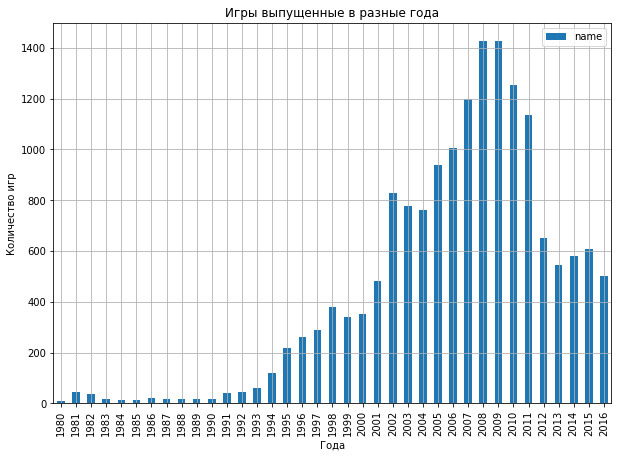

In [8]:
(data.groupby(['year_of_release'])\
                     .agg({'name':'count'})
                     .plot(kind = 'bar', figsize=(10,7), grid=True,))
plt.xlabel('Года')
plt.ylabel('Количество игр')
plt.title('Игры выпущенные в разные года')
plt.show()               

Из графика мы видим что индустрия начала стремительно развиваться с 1994 года пик кол-ва игр приходиться на 2008-2009 года, далее идет спад.Думаю весь временной диапозон не важен, нужно брать данные близкие к прогназируемому году, в разное время разное кол-во продаж и кол-во игр

<h5>3.2 Как менялись продажи по платформам<a class="tocSkip"></h5

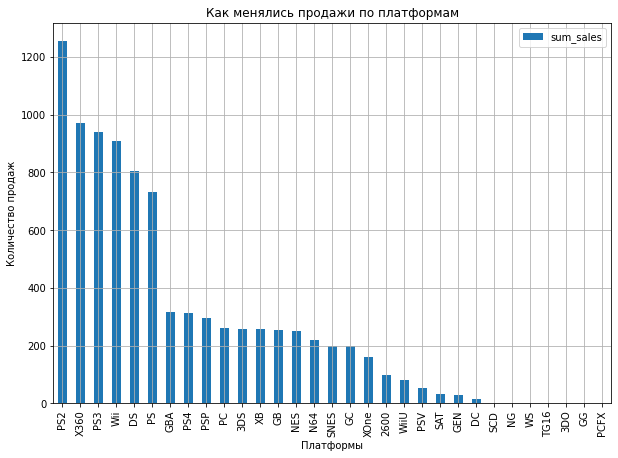

In [9]:
(data.groupby(['platform'])\
                     .agg({'sum_sales':'sum'}).sort_values(by='sum_sales',ascending=False)
                     .plot(kind = 'bar', figsize=(10,7), grid=True,))
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Как менялись продажи по платформам')
plt.show()               

Из графика видно что гигантами по кол-ву продаж являються ps2 x360 ps3 wii ds ps, но это всего лиш говорит о том что они были лучшие в свое время

<h5>3.3 Топ 5 платформ с наибольшими сумарными продажами<a class="tocSkip"></h5

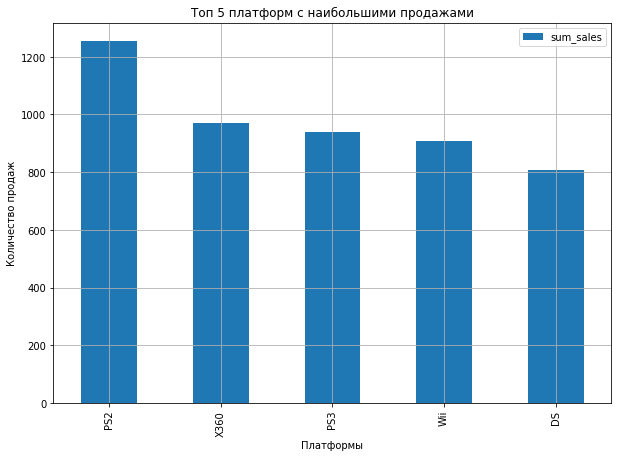

In [10]:
(data.groupby(['platform'])\
                     .agg({'sum_sales':'sum'}).sort_values(by='sum_sales',ascending=False).head(5)
                     .plot(kind = 'bar', figsize=(10,7), grid=True,))
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Топ 5 платформ с наибольшими продажами')
plt.show()               

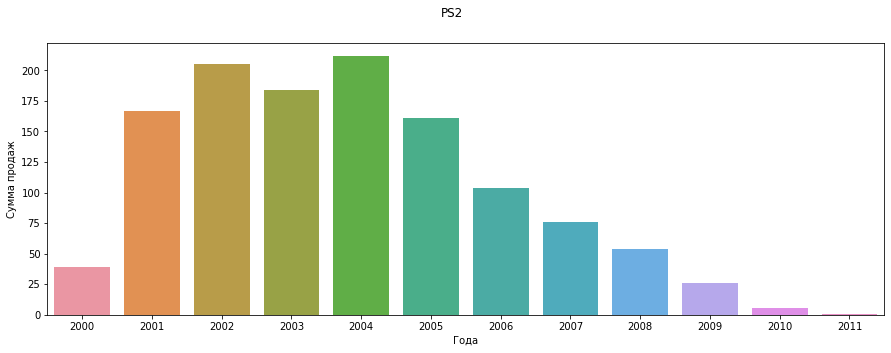

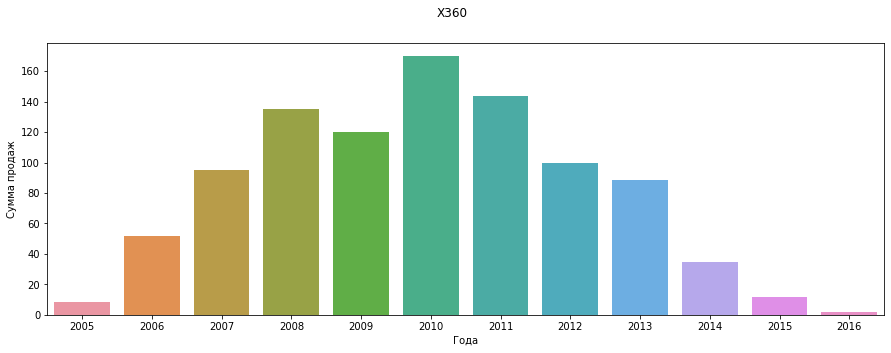

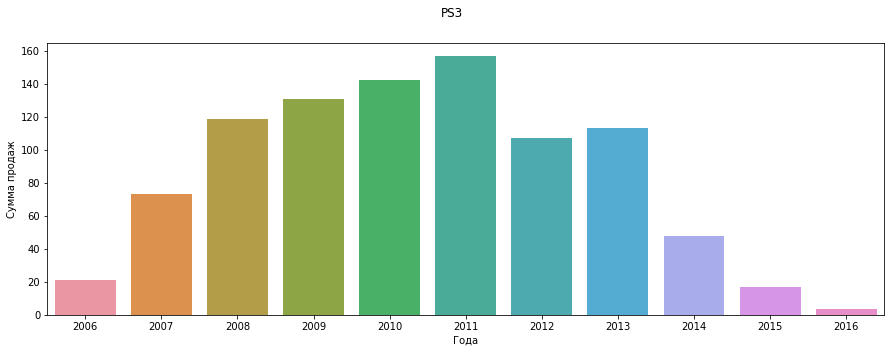

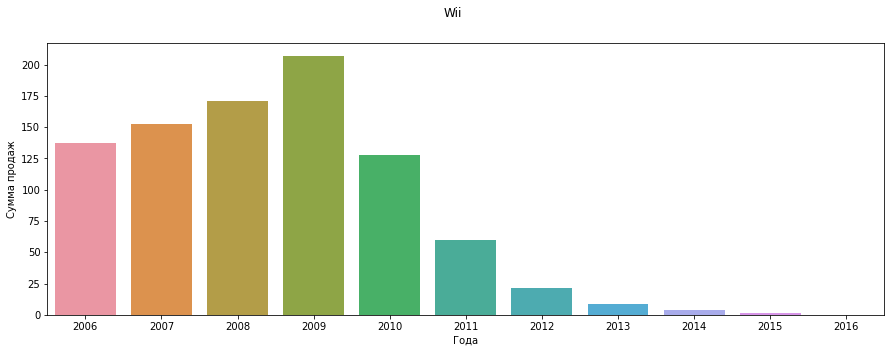

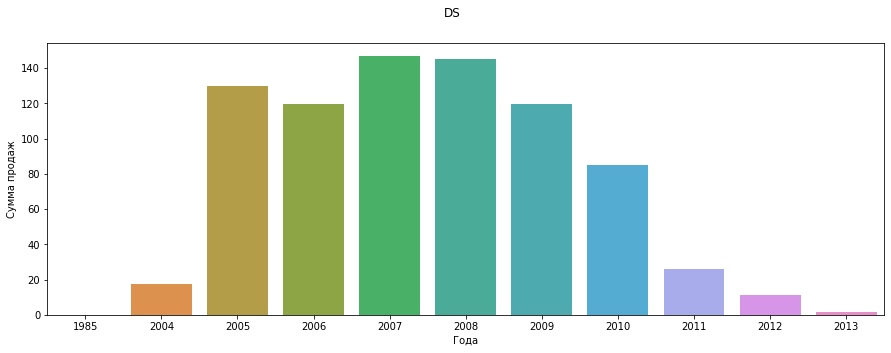

In [11]:
top_5_platform = ['PS2','X360','PS3','Wii','DS']
def platform_matrix(platform_name):
    platform = (data[data['platform'] == platform_name].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').reset_index())
    fig, ax = plt.subplots(figsize=(15,5))
    sb.barplot(data=platform, x='year_of_release', y='sum_sales')                 
    fig.suptitle(platform_name)
    plt.xlabel('Года')                 
    plt.ylabel('Сумма продаж') 
for platform in top_5_platform:
    platform_matrix(platform)                 

<h5>3.4 За какой характерный срок появляются новые и исчезают старые платформы?<a class="tocSkip"></h5

In [12]:
platform_validity = data.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min','max'])
platform_validity['platform_life'] = platform_validity['max'] - platform_validity['min'] +1
display(platform_validity)
platform_validity['platform_life'].median()

,min,max,platform_life
,year_of_release,year_of_release,
platform,,,
2600,1980,1989,10
3DO,1994,1995,2
3DS,2011,2016,6
DC,1998,2008,11
DS,1985,2013,29
GB,1988,2001,14
GBA,2000,2007,8
GC,2001,2007,7


7.0

Выяснил средний жизненый цикл платформ

<h5>3.5 Потенциально прибыльные платформы за актуальный период( с 2012 по 2016 включительно)<a class="tocSkip"></h5

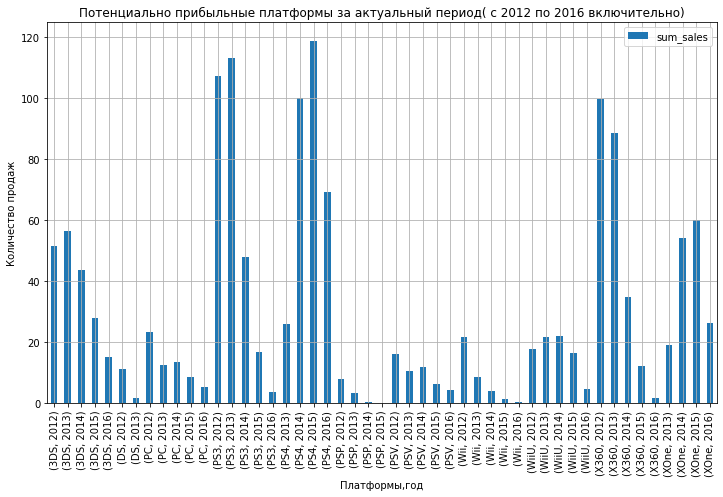

In [13]:
act_data = data.query('2012 <= year_of_release <= 2016')
lead_platform = (act_data.groupby(['platform','year_of_release'])\
                     .agg({'sum_sales':'sum'})
                     .plot(kind = 'bar', figsize=(12,7), grid=True,))
plt.xlabel('Платформы,год')
plt.ylabel('Количество продаж')
plt.title('Потенциально прибыльные платформы за актуальный период( с 2012 по 2016 включительно)')
plt.show()               

Отфильтровали датафрейм под "актуальный период", практически на всех платформах наблюдаеться спад продаж, видимио подходит к концу их жизненый цикл.Под потенциальо прибыльные платформы можно принять PS4 и XOne

<h5>Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<a class="tocSkip"></h5

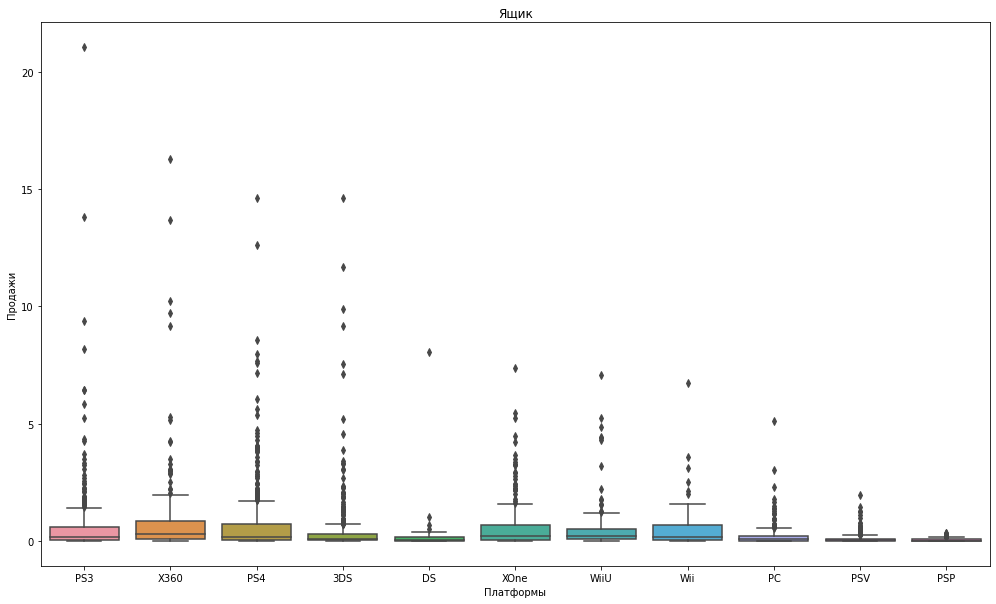

In [14]:
plt.figure(figsize=(17, 10))
sb.boxplot(data=act_data, x='platform', y='sum_sales')
plt.title('Ящик')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

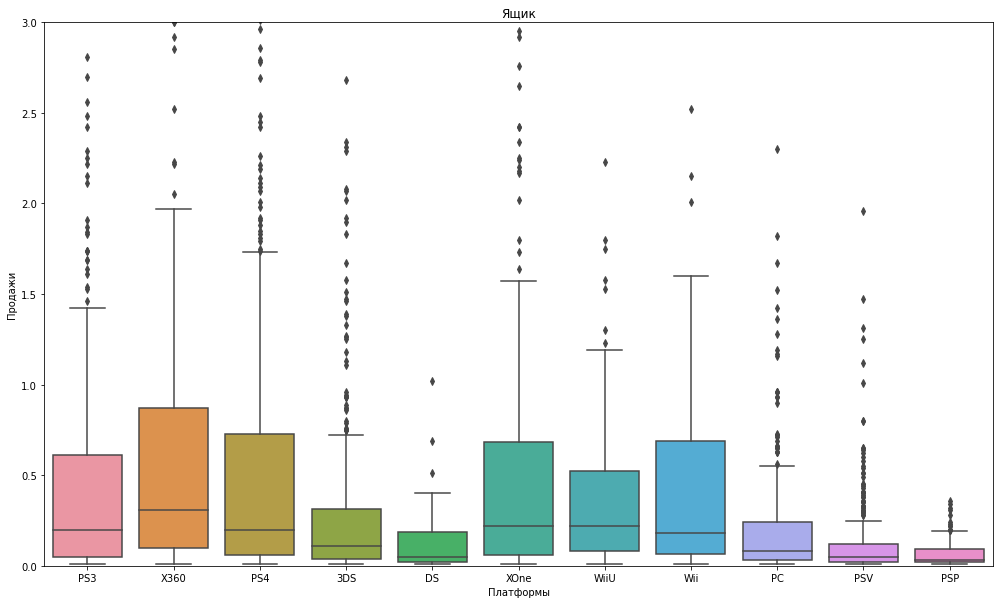

In [15]:
plt.figure(figsize=(17, 10))
sb.boxplot(data=act_data, x='platform', y='sum_sales')
plt.title('Ящик')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim([0,3])
plt.show()

На диаграмме размаха мы видим что на всех платформах присутствуют выбросы, продажи от медианы до 0,75 квантиля на всех платформах больше чем от 0,25 квантиля до медианы

<h5>3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.<a class="tocSkip"></h5

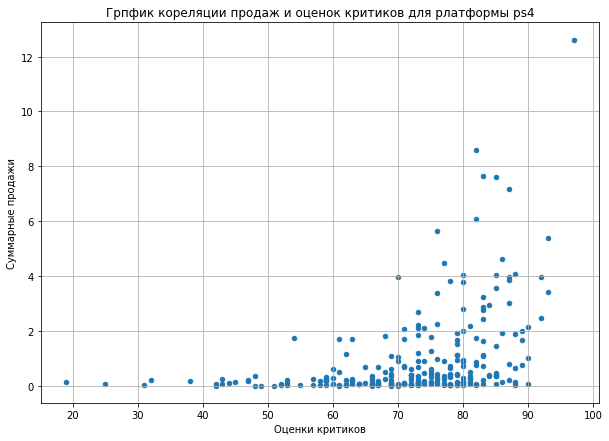

Коэффициент корреляции для критиков - PS4: 0.40656790206178095


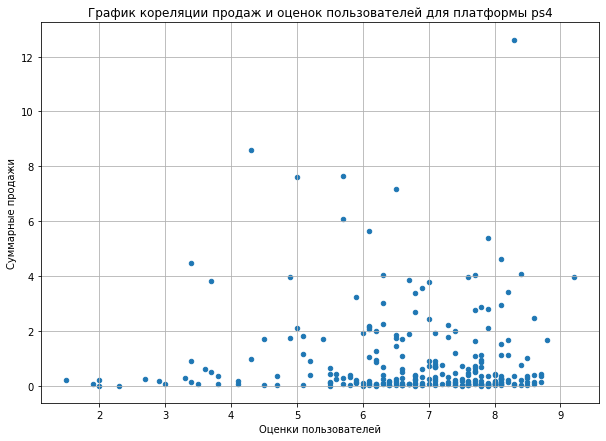

Коэффициент корреляции для пользователей - PS4: -0.031957110204556376


In [16]:
ps4_data = act_data.query('platform == "PS4"')

(ps4_data.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(10,7), title='Грпфик кореляции продаж и оценок критиков для рлатформы ps4', grid=True)) 
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show()

ps4_data['critic_score'] = ps4_data['critic_score'].astype('float64')
correlation_coefficient = ps4_data['critic_score'].corr(ps4_data['sum_sales'])
print('Коэффициент корреляции для критиков - PS4:', correlation_coefficient)


(ps4_data.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(10,7), title='График кореляции продаж и оценок пользователей для платформы ps4', grid=True)) 
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
correlation_coefficient = ps4_data['user_score'].corr(ps4_data['sum_sales'])
print('Коэффициент корреляции для пользователей - PS4:', correlation_coefficient)


На графиках корреляции продаж и оценок  мы видим что чем выше оценка критиков тем выше количество продаж, от себя добавлю я бы не стал судить по оценкам пользователей, ведь обычный обыватель или игроман не в состоянии судить беспристрастно, за редким исключением, критики же должны судить беспристрастно.Коэффициент корреляции для критиков - PS4: 0.40656790206178095 присутствует слабая связь между продажами и оценкой критиков.Коэффициент корреляции для пользователей - PS4: -0.031957110204556376 присутсвует очень слабая отрицательная связь, скорее евсего не стоит брать в расчет.

<h5>3.7 Соотнесите выводы с продажами игр на других платформах.<a class="tocSkip"></h5

Кореляция по оценкам пользователей и продаж PS3 -0.006205767686051523
Кореляция по оценкам критиков и продаж PS3 0.3341517575509856


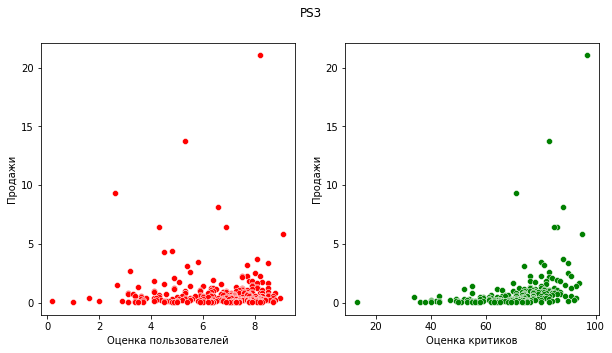

Кореляция по оценкам пользователей и продаж X360 0.006163978646213326
Кореляция по оценкам критиков и продаж X360 0.3605734888507336


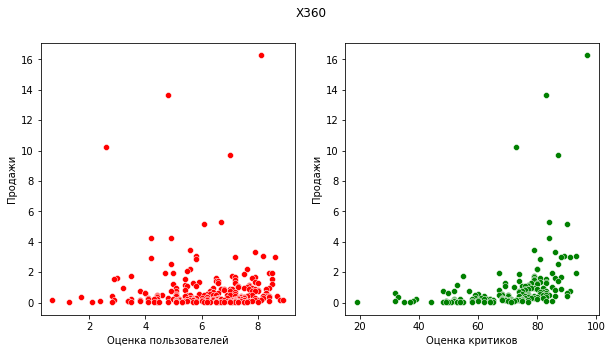

Кореляция по оценкам пользователей и продаж 3DS 0.19758263411038599
Кореляция по оценкам критиков и продаж 3DS 0.3208028695360785


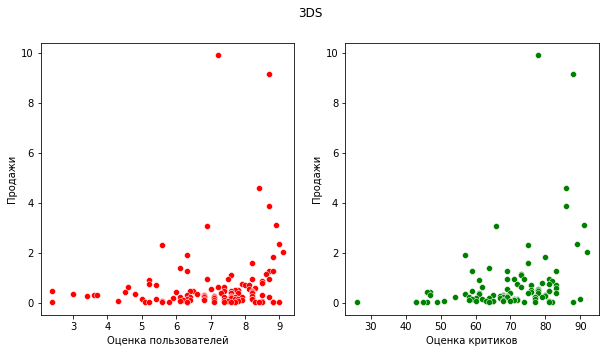

Кореляция по оценкам пользователей и продаж XONE -0.06892505328279414
Кореляция по оценкам критиков и продаж XONE 0.4169983280084017


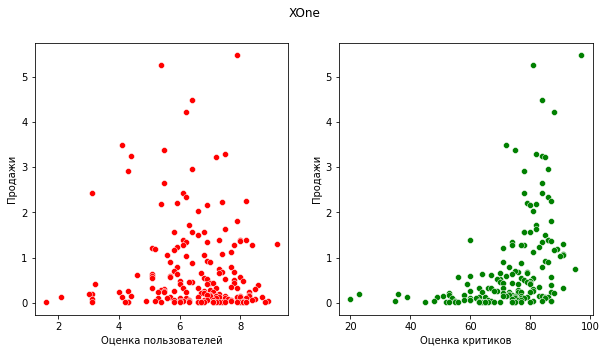

Кореляция по оценкам пользователей и продаж DS 0.88270872757644
Кореляция по оценкам критиков и продаж DS nan


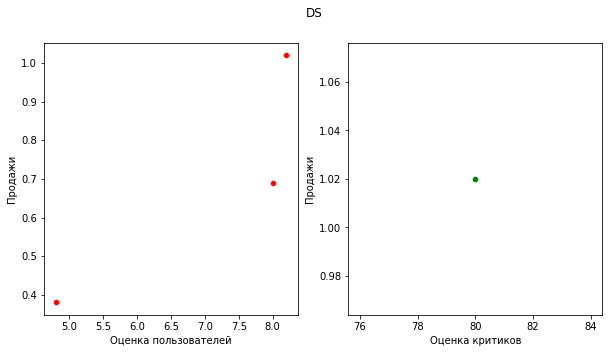

Кореляция по оценкам пользователей и продаж WIIU 0.4002190202148617
Кореляция по оценкам критиков и продаж WIIU 0.34837976012017485


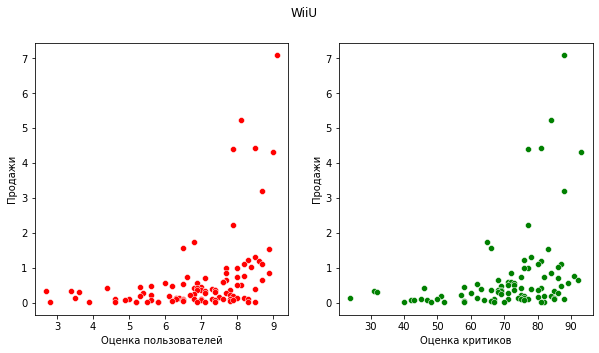

Кореляция по оценкам пользователей и продаж WII 0.29619680007479526
Кореляция по оценкам критиков и продаж WII -0.4243413011077494


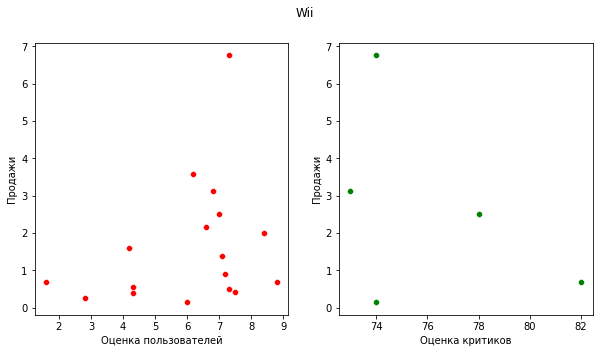

Кореляция по оценкам пользователей и продаж PC -0.12186747630735577
Кореляция по оценкам критиков и продаж PC 0.23724324311567915


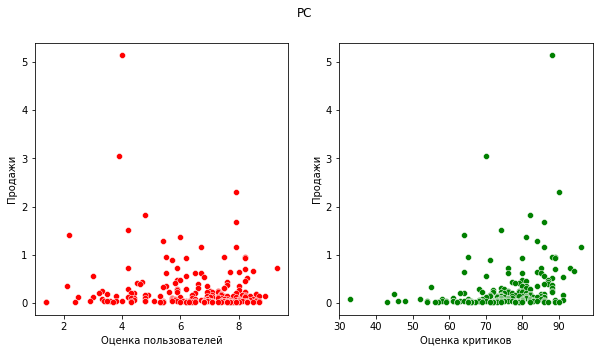

Кореляция по оценкам пользователей и продаж PSV -0.004339437514314869
Кореляция по оценкам критиков и продаж PSV 0.0944878992931617


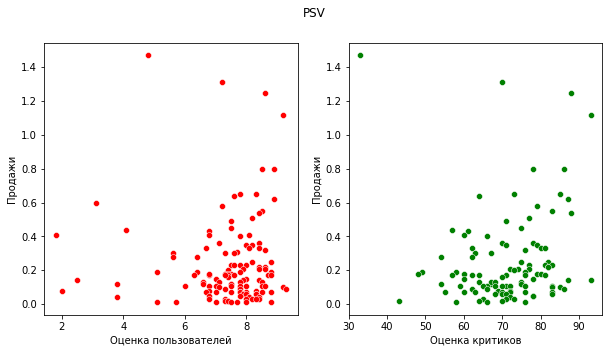

Кореляция по оценкам пользователей и продаж PSP -0.802302061939321
Кореляция по оценкам критиков и продаж PSP nan


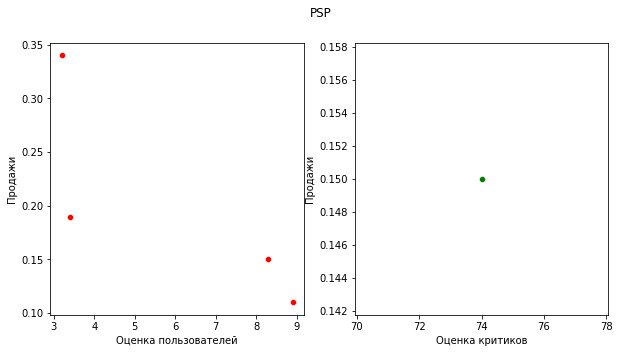

In [17]:
other_platform = ['PS3','X360','3DS','XOne','DS','WiiU','Wii', 'PC', 'PSV', 'PSP']
def platform_matrix(platform_name):
    platform = (act_data[act_data['platform'] == platform_name])
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    sb.scatterplot(color='red', x='user_score', y='sum_sales', data=platform, ax=ax[0])
    sb.scatterplot(color='green', x='critic_score', y='sum_sales', data=platform, ax=ax[1])                 
    fig.suptitle(platform_name)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Продажи')
    ax[1].set(ylabel='Продажи')
    user_corr = platform['user_score'].corr(platform['sum_sales'])
    critic_corr = platform['critic_score'].corr(platform['sum_sales'])
    print('Кореляция по оценкам пользователей и продаж', platform_name.upper(),user_corr)
    print('Кореляция по оценкам критиков и продаж', platform_name.upper(), critic_corr)
    plt.show()
for platform in other_platform:
    platform_matrix(platform)      

Вывод такой же как по платформе PS4, за исключением DS,PSP,Wii, так как для этих платформ пришел закат их жизни.

<h5>3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?<a class="tocSkip"></h5

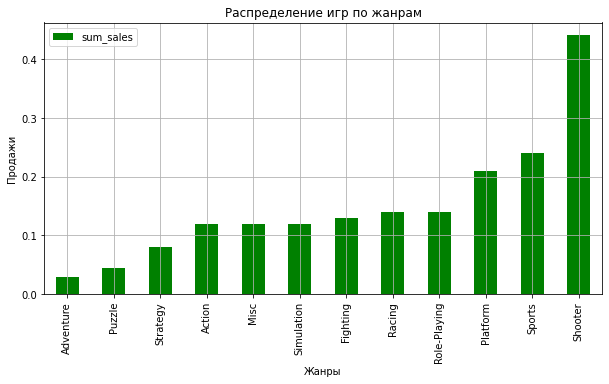

In [18]:
data_genre = (act_data.groupby(['genre'])\
             .agg({'sum_sales':'median'}).sort_values(by = 'sum_sales')
             .plot(kind='bar',grid=True, color='green',title='Распределение игр по жанрам',
                  figsize=(10,5)))
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

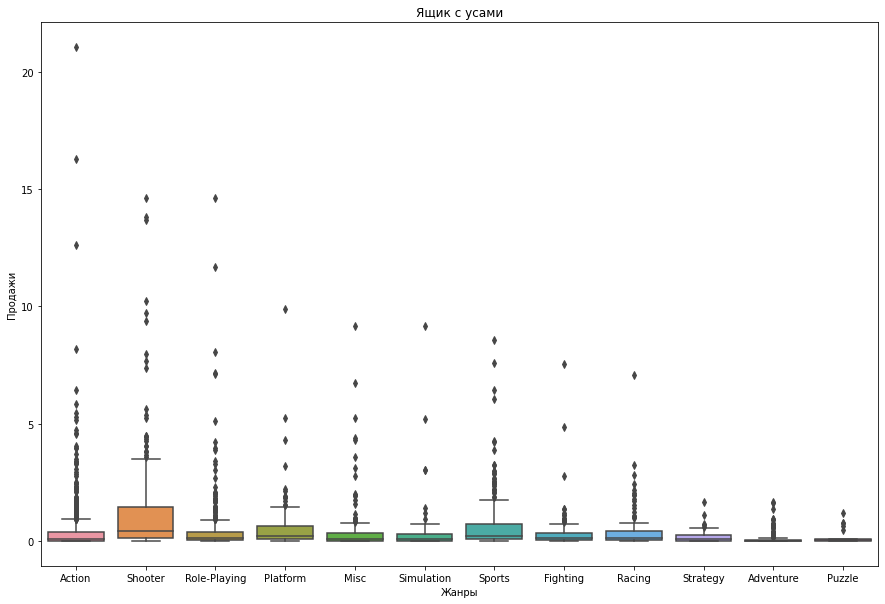

In [19]:
plt.figure(figsize=(15, 10))
sb.boxplot(data=act_data, x='genre', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

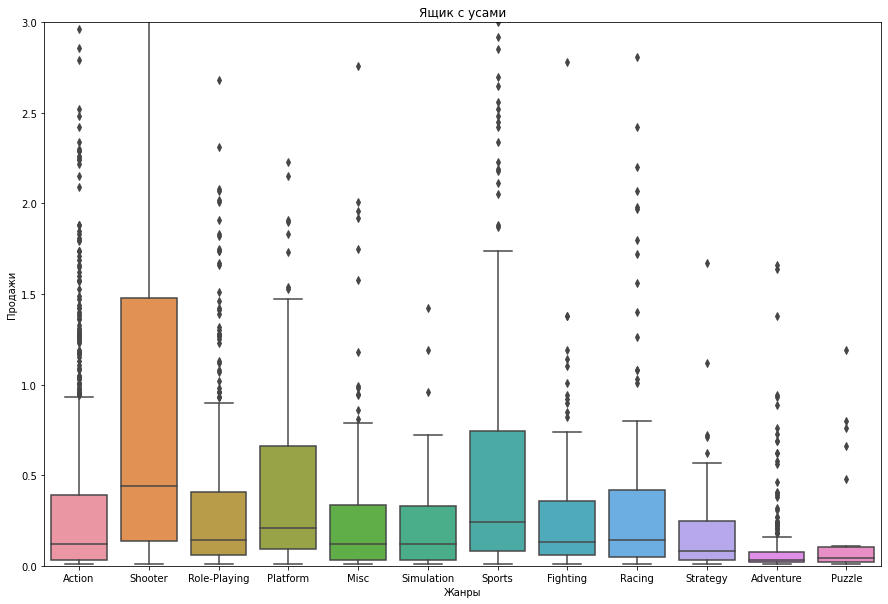

In [20]:
plt.figure(figsize=(15, 10))
sb.boxplot(data=act_data, x='genre', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.ylim([0,3])
plt.show()

Из графиков видно что лидируют несколько жанров(Shooter,Sports) на них есть явный спрос.

<h2>4 Составьте портрет пользователя каждого региона  <a class="tocSkip"></h2


<h5>Определите для пользователя каждого региона (NA, EU, JP):<a class="tocSkip"></h5

<h5>4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.<a class="tocSkip"></h5

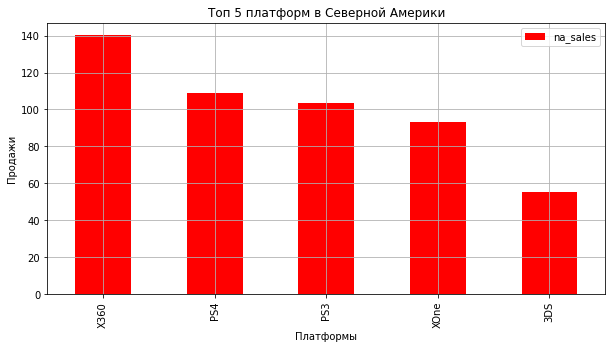

In [21]:
(act_data.groupby(['platform'])\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
.plot(kind='bar',grid=True, color='red',
     figsize=(10,5)))
plt.title('Топ 5 платформ в Северной Америки')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

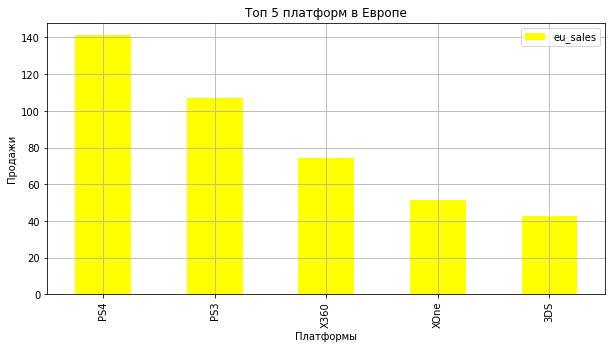

In [22]:
(act_data.groupby(['platform'])\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
.plot(kind='bar',grid=True, color='yellow',
     figsize=(10,5)))
plt.title('Топ 5 платформ в Европе')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

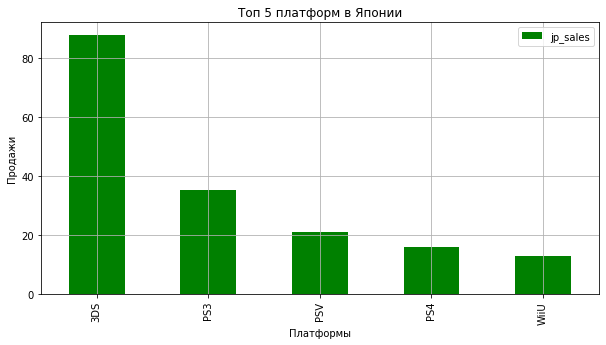

In [23]:
(act_data.groupby(['platform'])\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
.plot(kind='bar',grid=True, color='green',
     figsize=(10,5)))
plt.title('Топ 5 платформ в Японии')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

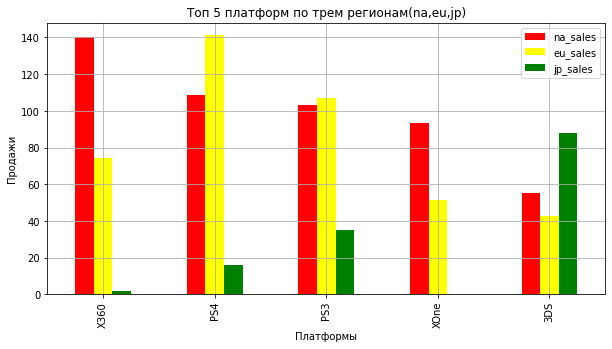

In [24]:
(act_data.groupby(['platform'])\
.agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
.plot(kind='bar',grid=True, color=['red','yellow','green'],
     figsize=(10,5)))
plt.title('Топ 5 платформ по трем регионам(na,eu,jp)')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

В Северной Америке лидирует x360, за этой платформой расположились с небольшим отрывом друг от друга ps3,ps4,xone, замыкает топ 3ds.В Европе популярной платформой считают ps4, за ней с рафномерным отрывом расположились ps3,x360,xone, топ так же занимает 3ds.В Японии совсем другая ситуация топом считаеться 3ds,за этой платформой следует ps3,psv,ps4, топ замыкает wiiu, отсутствует xone.

<h5>4.2 Самые популярные жанры (топ-5). Поясните разницу.<a class="tocSkip"></h5

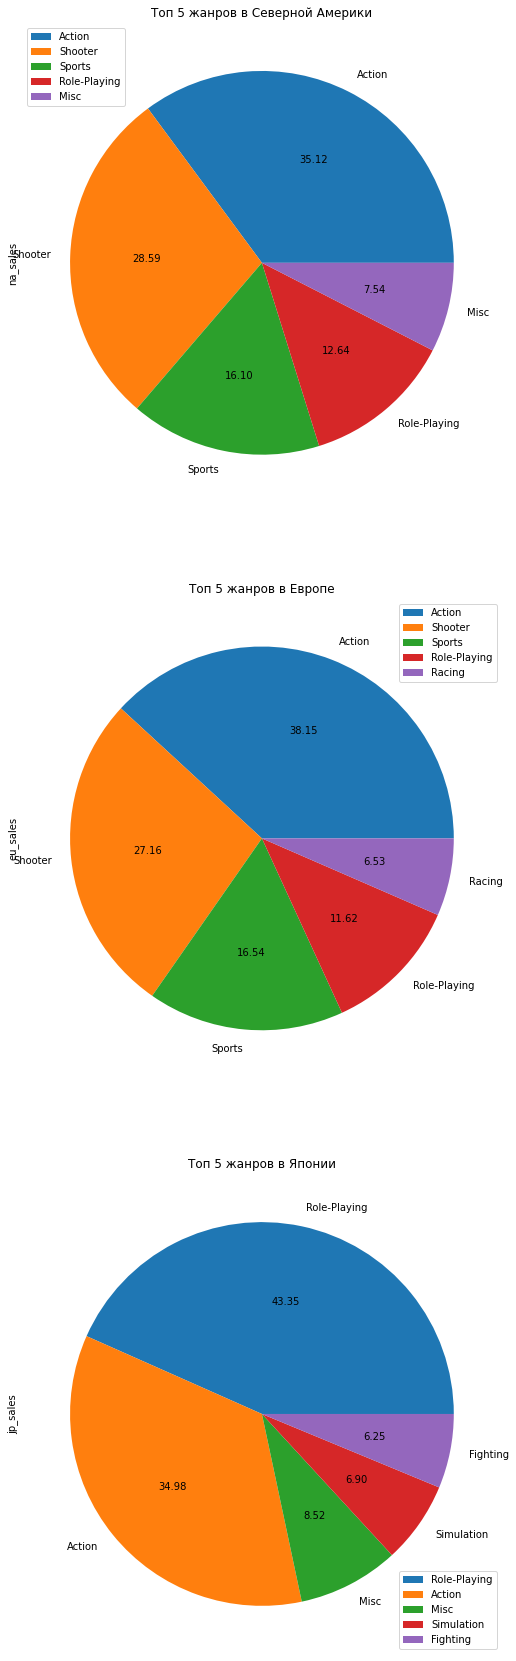

In [25]:
def platform_matrix(platform_name):
    fig, ax = plt.subplots(3, figsize=(30,30))
    na = (act_data.groupby(['genre'])\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
.plot(kind='pie', x='genre', y='na_sales', autopct="%.2f", ax=ax[0]))
    eu = (act_data.groupby(['genre'])\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
.plot(kind='pie', x='genre', y='eu_sales', autopct="%.2f", ax=ax[1]))
    jp = (act_data.groupby(['genre'])\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
.plot(kind='pie', x='genre', y='jp_sales', autopct="%.2f", ax=ax[2]))
    ax[0].set_title('Топ 5 жанров в Северной Америки')
    ax[1].set_title('Топ 5 жанров в Европе')
    ax[2].set_title('Топ 5 жанров в Японии')
    plt.show()
platform_matrix(data)

В Свереной Америке и Европе самыми популярными жанрами являются Action,Shooter.В Японии же лидируют Role-Playing и Action.

<h5>4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?<a class="tocSkip"></h5

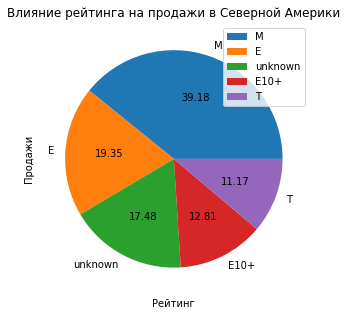

In [26]:
(act_data.groupby(['rating'])\
.agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
.plot(kind='pie',x='rating', y='na_sales',autopct="%.2f",
     figsize=(10,5)))
plt.title('Влияние рейтинга на продажи в Северной Америки')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

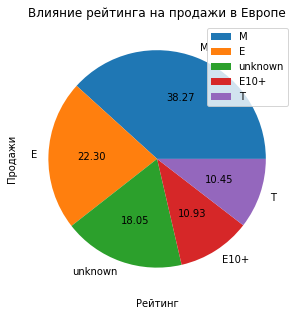

In [27]:
(act_data.groupby(['rating'])\
.agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
.plot(kind='pie',x='rating', y='eu_sales', autopct="%.2f",
     figsize=(10,5)))
plt.title('Влияние рейтинга на продажи в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

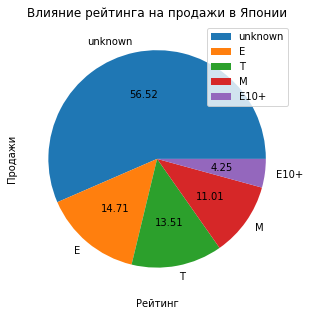

In [28]:
(act_data.groupby(['rating'])\
.agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
.plot(kind='pie',x='rating', y='jp_sales', autopct="%.2f",
     figsize=(10,5)))
plt.title('Влияние рейтинга на продажи в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

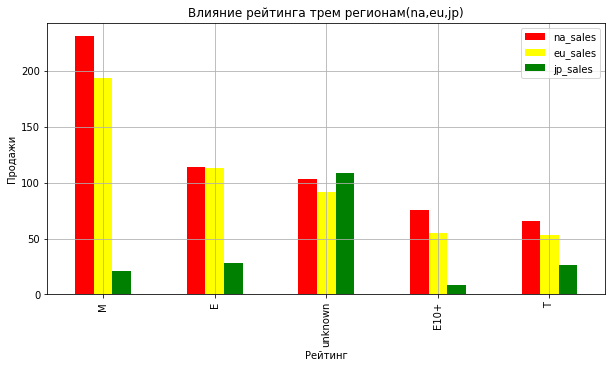

In [29]:
(act_data.groupby(['rating'])\
.agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)
.plot(kind='bar',grid=True, color=['red','yellow','green'],
     figsize=(10,5)))
plt.title('Влияние рейтинга трем регионам(na,eu,jp)')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

ESRB:
E - (Everyone) - для всей аудитории
M - (Mature ) — для лиц старше 17 лет(ага)
T - (Teen) — для аудитории старше 13 лет
E10+ - (Everyone 10 and older) — для всех старше 10 лет

В Северной Америке и Европе популярней всего игры с рейтингом M - (Mature ) — для лиц старше 17 лет и Е - (Everyone) - для всей аудитории, в Японии же более популярны T - (Teen) — для аудитории старше 13 лет и E - (Everyone) - для всей аудитории.

<h2>5 Проверка гипотез<a class="tocSkip"></h2

<h5>5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a class="tocSkip"></h5

H_0 Средние пользовательские рейтинги платформ Xbox One и PC равны

H_1 Средние пользовательские рейтинги платформ Xbox One и PC не равны или больше/меньше

In [31]:
xone_data = act_data.query('platform == "XOne"')
xone_rating = xone_data['user_score']
pc_data = act_data.query('platform == "PC"')
pc_rating = pc_data['user_score']
display(len(xone_rating))
display(len(pc_rating))
result = st.ttest_ind(xone_rating,
                     pc_rating,
                     nan_policy='omit',
                     equal_var=False)
alpha = 0.05

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Нулевую гипотезу не удалось отвергнуть')
    


247

250

0.5489537965134987
Нулевую гипотезу не удалось отвергнуть


Выяснили что выборки разного размера, по этому применяем equal_var=False.Так как присутствуют 2 выборки, выполняем проверку двух генеральных совокупностей scipy.stats.ttest_ind(). Нулевую гипотезу не удалось отвергнуть.


Из имеющихся данный на уровне значимости alpha = 0.05 нет основания отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

<h5>5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<a class="tocSkip"></h5

H_0 Средние пользовательские рейтинги жанров Action и Sports равны

H_1 Средние пользовательские рейтинги платформ Xbox One и PC не равны или больше/меньше

In [32]:
action_data = act_data.query('genre == "Action"')
action_rating = action_data['user_score']
sports_data = act_data.query('genre == "Sports"')
sports_rating = sports_data['user_score']
display(len(action_rating))
display(len(sports_rating))
result = st.ttest_ind(action_rating,
                     sports_rating,
                     nan_policy='omit',
                     equal_var=False)
alpha = 0.05

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Нулевую гипотезу не удалось отвергнуть')

1031

267

5.98945806646755e-20
Отвергаем нулевую гипотизу


Выяснили что выборки разного размера, по этому применяем equal_var=False.Так как присутствуют 2 выборки, выполняем проверку двух генеральных совокупностей scipy.stats.ttest_ind(). Отвергаем нулевую гипотизу.


    
На основании имеющихся данных и с использованием уровня значимости alpha = 0.05, можно сделать вывод, что нулевая гипотеза о равенстве средних значений пользовательских рейтингов для жанров Action и Sports должна быть отвергнута в пользу альтернативной гипотезы.


Нулевая гипотизе и алтернативная были сформулированы исходя из иследовательского вопроса, в первом задании из иследовательского вопроса была сформулирована нулевая гипотиза(H_0 Средние пользовательские рейтинги платформ Xbox One и PC равны), соответственно альтернативная гипотиза может принять любой из трех видов(левосторонняя,правосторонняя,двусторонняя).Во втором задании из иследовательского вопроса была сформулирована альтернативная гипотеза которая так же может принять любой из трех видов(левосторонняя,правосторонняя,двусторонняя),нулевая была сформулирована опять же из иследовательского вопроса.Послкольку у нас пристутствуеют две независимые выборки было принято решение использовать двухвыборочный t-тест для независимых выборок st.ttest_ind.

<h2>6 Общий вывод<a class="tocSkip"></h2

Привел названия стобцов к нижнему регистру

Преобразовали типы данных 

Заминили абривиатуру 'tbd' на 'NaN'

Избавились от пропусков и не явных дубликатов

Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

Индустрия начала стремительно развиваться с 1994 года пик кол-ва игр приходиться на 2008-2009 года, начиная с 2010 года количество выпускаемых игр пошло на снижение.

В топ конкурентов среди продаж вошли:

PlayStation 2 (успешен в 2002-2004 годах)

Xbox360 (успешен в 2010-2011 годах)

PlayStation 3 (успешен в 2008-2011 годах)

Wii Nintendo (успешен в 2006-2009 годах)

Nintendo DS (успешен в 2007-2008 годах)

Новые платформы стремительно набирают популярность, медианное значение цикла жизни платформы составляет 6 лет.Пик популярности платформы приходится на середину жизни платформы и составляет 3-4 года, затем наблюдаетсья спад продаж. Не все платформы из представленного топа являются актуальными. Платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, второе место по продажам игр за 2014-2016 год занимает XboxOne. PS4 и XboxOne являются потенциальнее остальных платформ.На них можно сделать акцент.

По поводу корелиции для PS4 (потенциально самой успешной платформы):

Коэффициент корреляции для критиков - PS4: 0.40656790206178095 присутствует слабая связь между продажами и оценкой критиков.
Оценки критиков влияют на количество продаж, хоть и слабо

Коэффициент корреляции для пользователей - PS4: -0.031957110204556376 присутсвует очень слабая отрицательная связь, скорее евсего не стоит брать в расчет.

Из самых популярны жанров можно выделить несколько: Shooter,Sports,Action на них есть явный спрос.


    
В Северной Америке и Европе пользуютсья спросом такие жанры как Shooter и Action.Лидирующие позиции по рейтингу ESRB в этих регионах занимают M - (Mature ) — для лиц старше 17 лет, E - (Everyone) - для всей аудитории .Для этих регионов стоит делать акцент на них.
В Японии же пользуются спросом жанры Role-Playing и Action. По рейтингу в Японии не все так однозначно,поскольку Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде,в полной мере проанализировать не удалось, можно лишь сделать предположение что лидирующую позицию занимают игры с такой же маркировкой ESRB как и в других регионах M - (Mature ) — для лиц старше 17 лет,второе место занимает E - (Everyone) - для всей аудитории .Исходя из проведеного анализа стоит сделать акцент на таких платформах как PS4 и XboxOne.Заострять внимание на отзывах пользователей не имеет смысла, что не скажешь о критиках, хотя и это не основопологающий фактор увелечения продаж.